## 1.1 波士顿房价数据处理的练习，第一遍

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

SEED = 20

# 从本地文件读取数据
train_house_data = pd.read_csv('D:\\研究生\\机器学习\\线性回归数据集\\house_price\\train.csv')
test_house_data = pd.read_csv('D:\\研究生\\机器学习\\线性回归数据集\\house_price\\test.csv')

# 对训练数据和测试数据进行统一处理
all_features = pd.concat([train_house_data.iloc[:,1:-1],test_house_data.iloc[:,1:]],ignore_index=True,axis=0)

# 对数字的特征进行处理，把空值填为每列的平均值，再做标准化
number_columns = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[number_columns] = all_features[number_columns].fillna(all_features[number_columns].mean())
all_features[number_columns] = all_features[number_columns].apply(lambda x: (x - x.mean())/(x.std()))

# 对非数字类型的特征生成热度编码
all_features = pd.get_dummies(all_features,dummy_na = True)

# 对训练数据和测试数据进行分割
n_train = train_house_data.shape[0]
train_data = all_features.iloc[:n_train,:].values.astype(np.float32)
test_data = all_features.iloc[n_train:,:].values.astype(np.float32)
train_data_label = train_house_data.loc[:,['SalePrice']].values.astype(np.float32)

# 切分训练集/验证集
# 目的：从训练集再划出一部分做验证，监控过拟合。
X_train , X_valid ,y_train ,y_valid = train_test_split(train_data,train_data_label,test_size=0.2, random_state=SEED)



## 1.2 波士顿房价数据处理的练习，第二遍

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

SEED = 20
# 读取测试训练数据和测试数据
train_ori_data = pd.read_csv('D:\\研究生\\机器学习\\线性回归数据集\\house_price\\train.csv')
test_ori_data = pd.read_csv('D:\\研究生\\机器学习\\线性回归数据集\\house_price\\test.csv')

# 把训练数据和测试数据拼接到一起进行预处理
all_features = pd.concat([train_ori_data.iloc[:,1:-1],test_ori_data.iloc[:,1:]],ignore_index=True,axis=0)

# 处理特征中的数字
# 先选出数字列
number_columns = all_features.dtypes[all_features.dtypes != 'object'].index
# 对于数字列中为空的填充平均值
all_features[number_columns] = all_features[number_columns].fillna(all_features[number_columns].mean())
# 再做标准化
all_features[number_columns] = all_features[number_columns].apply(lambda x: (x - x.mean())/x.std())

# 进行热独编码
all_features = pd.get_dummies(all_features,dummy_na = True)

#拆分训练数据和测试数据
n_sample = train_ori_data.shape[0]
train_data = all_features.iloc[:n_sample,:].values.astype(np.float32)
test_data = all_features.iloc[n_sample:,:].values.astype(np.float32)
train_label = train_ori_data.loc[:,['SalePrice']]

# 训练集进行划分
X_train,X_valid,y_train,y_valid = train_test_split(train_data,train_data_label,test_size=0.2,random_state=SEED)

[[-0.16787669 -0.7181657  -0.48511675 ...  1.          0.
   0.        ]
 [-0.8734664   0.5017845  -0.06569219 ...  1.          0.
   0.        ]
 [-0.16787669  0.         -0.3997864  ...  1.          0.
   0.        ]
 ...
 [-0.8734664   0.17333637  3.6688094  ...  1.          0.
   0.        ]
 [ 1.4784993  -1.3281407  -0.61342925 ...  1.          0.
   0.        ]
 [ 0.537713    0.17333637 -0.05491496 ...  1.          0.
   0.        ]]


## 1.3 预测

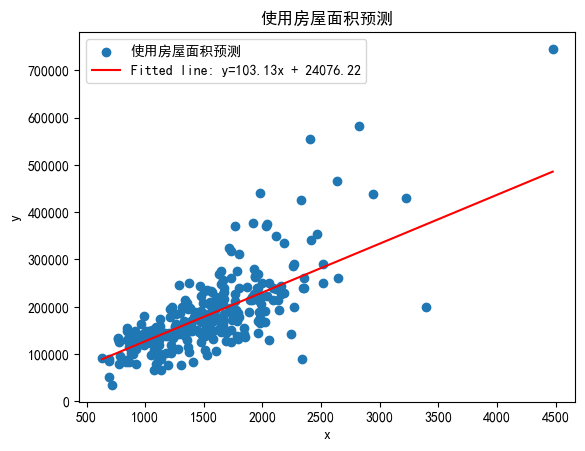

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
SEED = 20

# 读取数据
train_ori_data = pd.read_csv('../data/house_train.csv')
tset_ori_data = pd.read_csv('../data/house_test.csv')

# 训练数据和测试数据进行拼接
all_features = pd.concat([train_ori_data.iloc[:,1:-1],test_ori_data.iloc[:,1:]],ignore_index=True,axis=0)

# 先对数字数据进行处理，空的数字填充为每一列的平均值，再进行缩放
number_columns = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[number_columns] = all_features[number_columns].fillna(all_features[number_columns].mean())
all_features[number_columns] = all_features[number_columns].apply((lambda x: (x - x.mean())/x.std()))

# 使用热独编码处理字符类型
all_features = pd.get_dummies(all_features,dummy_na=True)

# 对训练数据和测试数据进行拆分还原
n_samples = train_ori_data.shape[0]
train_label = train_ori_data.loc[:,['SalePrice']]
train_data = all_features.iloc[:n_samples,:].values.astype(np.float32)
test_data = all_features.iloc[n_samples:,:].values.astype(np.float32)

# 对训练集进行分割
X_train,y_train,X_test,y_test = train_test_split(train_data,train_label)

# 使用线性回归模型对波士顿房价进行预测
class LinearRegression:

    def __init__(self):
        self.w = None
        self.b = None
    def fit(self, X, y):
        y = np.asarray(y).ravel()  # 确保 y 是一维
        X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        XTX = X_with_bias.T @ X_with_bias
        XTy = X_with_bias.T @ y
        theta = np.linalg.solve(XTX, XTy)  # 更稳定
        self.b = theta[0]
        self.w = theta[1:]
    def predict(self, X):
        return X @ self.w + self.b
# 使用
grLivArea = np.asarray(train_ori_data['GrLivArea']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(grLivArea, train_label, test_size=0.2, random_state=SEED)
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

w = model.w.item()   # 安全提取标量

b = model.b.item()   # 虽然不是必须，但统一处理更清晰

# 4. 可视化拟合结果
x_line = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1) # 去特征的最小值和最大值，在其中间均匀生成100个点，然后生成100*1的向量
y_line = w * x_line + b

plt.scatter(X_test,y_test, label='使用房屋面积预测')
plt.plot(x_line, y_line, color='red', label=f'训练的线: y={w:.2f}x + {b:.2f}')
plt.title('使用房屋面积预测')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()